In machine learning, classification means categorizing the known classes, For example, categorizing the most profitable and non-interested customers from a dataset for advertising a particular product.

Classification is the task of categorizing the known classes based on their features. In most classification problems, machine learning algorithms will do the job, but while classifying a large dataset of images, you will need to use a neural network.

Now let’s come back to classification with neural networks. In this section, I will take you through the task of image classification with neural network using Python. Here, I will be using the famous MNIST fashion dataset, which contains 70,000 clothing fashion images. Here our task is to train an image classification model with neural networks.

I will start this task by importing the necessary Python libraries and the dataset:

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
fashion = keras.datasets.fashion_mnist
(xtrain, ytrain), (xtest, ytest) = fashion.load_data()

4431872/4422102 [==============================] - 2s 0us/step


Before moving forward, let’s have a quick look at one of the samples of the images from the dataset:

Image Label : 5


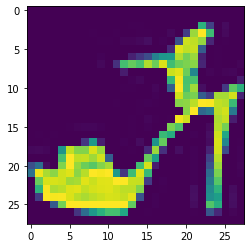

In [2]:
imgIndex = 9
image = xtrain[imgIndex]
print("Image Label :",ytrain[imgIndex])
plt.imshow(image)

Now let’s have a look at the shape of both the training and test data:

In [3]:
print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28)
(10000, 28, 28)


## Building a Neural Network Architecture

Now I will build a neural network architecture with two hidden layers:

In [4]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
None


Before training our model, I will split the training data into training and validation sets:

In [5]:
xvalid, xtrain = xtrain[:5000]/255.0, xtrain[5000:]/255.0
yvalid, ytrain = ytrain[:5000], ytrain[5000:]

## Training a Classification Model with Neural Networks

Now here’s how we can train a neural network for the task of image classification:

In [6]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
history = model.fit(xtrain, ytrain, epochs=30, 
                    validation_data=(xvalid, yvalid))

Epoch 1/30
1719/1719 [==============================] - 30s 17ms/step - loss: 0.7151 - accuracy: 0.7614 - val_loss: 0.5358 - val_accuracy: 0.8186
Epoch 2/30
1719/1719 [==============================] - 28s 16ms/step - loss: 0.4910 - accuracy: 0.8281 - val_loss: 0.5059 - val_accuracy: 0.8262
Epoch 3/30
1719/1719 [==============================] - 30s 17ms/step - loss: 0.4448 - accuracy: 0.8431 - val_loss: 0.4183 - val_accuracy: 0.8568
Epoch 4/30
1719/1719 [==============================] - 29s 17ms/step - loss: 0.4164 - accuracy: 0.8533 - val_loss: 0.4079 - val_accuracy: 0.8628
Epoch 5/30
1719/1719 [==============================] - 29s 17ms/step - loss: 0.3961 - accuracy: 0.8601 - val_loss: 0.4207 - val_accuracy: 0.8582
Epoch 6/30
1719/1719 [==============================] - 27s 16ms/step - loss: 0.3817 - accuracy: 0.8645 - val_loss: 0.3727 - val_accuracy: 0.8692
Epoch 7/30
1719/1719 [==============================] - 30s 17ms/step - loss: 0.3672 - accuracy: 0.8700 - val_loss: 0.3649 -

Now let’s have a look at the predictions:

In [7]:
new = xtest[:5]
predictions = model.predict(new)
print(predictions)

[[0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 1.000000e+00]
 [0.000000e+00 0.000000e+00 1.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00]
 [0.000000e+00 1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00]
 [0.000000e+00 1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00]
 [2.806236e-32 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00]]


Here is how we can look at the predicted classes:

In [8]:
classes = np.argmax(predictions, axis=1)
print(classes)

[9 2 1 1 6]


## Summary

Classification is the task of categorizing the known classes based on their features. In most classification problems, machine learning algorithms will do the job, but while classifying a large dataset of images, you will need to use a neural network.